# importing model

In [1]:
from torchvision import models

In [2]:
dir(models) # list all possible model can be used 

['AlexNet',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'regnet',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 're

In [3]:
# alexnet = models.AlexNet()
resnet = models.resnet101(pretrained=True) # loading resnet101 pretrained model

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [19]:
# resnet

In [5]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

# importing image(s) from the google drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from PIL import Image
img = Image.open("/content/drive/My Drive/ECGR4106-RealTimeAI/hw0/img0.jpg")

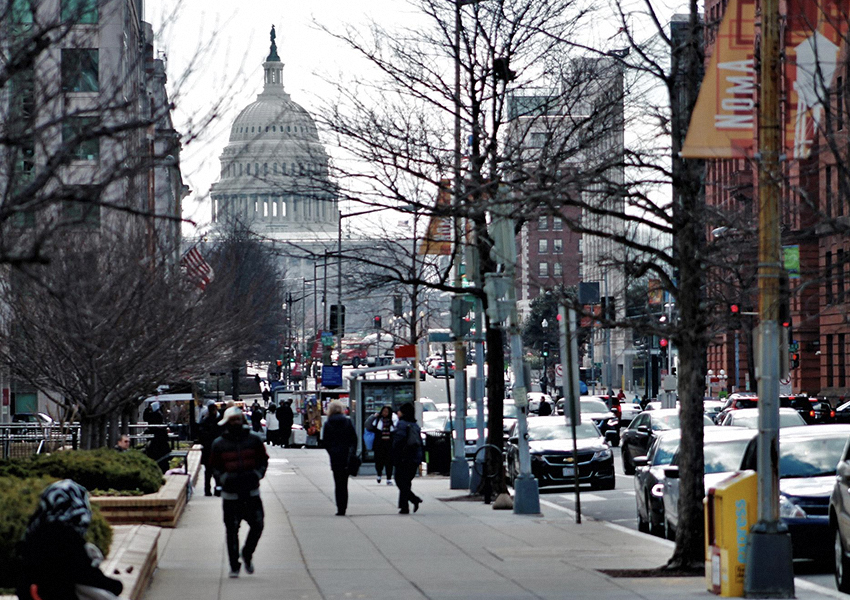

In [8]:
img

In [9]:
img_t = preprocess(img)

# pytorch using resnet model

In [10]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

In [11]:
resnet.eval()  #evaluation resnet model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
out = resnet(batch_t) # display output tensors of the image

tensor([[-2.3615e+00, -2.2007e+00, -3.6725e-01, -1.7139e+00, -2.0650e+00,
         -1.2895e+00, -2.4498e+00,  3.9578e-01, -2.7873e-01, -2.6711e+00,
         -3.3685e+00, -2.7345e+00, -1.7956e+00, -3.2364e+00, -2.9537e+00,
         -1.3508e+00, -1.1804e+00, -1.1141e+00, -1.3006e-01, -1.2341e+00,
         -2.0325e+00, -2.2160e+00,  1.3805e+00, -1.7617e+00, -1.2014e-01,
         -3.3602e+00, -3.2150e+00, -3.1790e+00, -3.8856e+00, -1.9730e+00,
         -3.5847e+00, -4.6208e+00, -4.3555e+00, -2.5075e+00, -1.1749e+00,
         -3.2617e+00, -1.3892e+00, -3.2069e+00, -2.0902e+00,  5.8310e-01,
         -1.6041e+00, -1.0338e-01, -3.2546e+00, -3.3622e+00,  1.1347e-01,
         -2.0304e+00, -1.7415e+00, -2.5922e+00, -1.9841e+00, -2.5989e+00,
          4.2087e-01,  1.4572e+00, -2.4015e+00, -3.4889e+00, -3.0455e+00,
         -2.6982e+00, -3.7111e+00, -4.1747e+00, -3.0023e+00, -2.6713e+00,
         -1.7369e-01, -3.1270e+00, -2.5166e+00, -2.4196e+00, -3.2839e+00,
         -1.8573e+00, -4.1692e+00, -2.

In [15]:
with open('/content/drive/My Drive/ECGR4106-RealTimeAI/hw0/imagenet_classes.txt') as f: # using list of imagenet classes from text file
    labels = [line.strip() for line in f.readlines()]

In [16]:
_, index = torch.max(out, 1)

In [17]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item() # showing the image classifcation highest possible result

('dome', 19.680490493774414)

In [18]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]] # showwing all possible result of image classifciation

[('dome', 19.680490493774414),
 ('mosque', 13.809450149536133),
 ('streetcar, tram, tramcar, trolley, trolley car', 12.42386531829834),
 ('obelisk', 11.184981346130371),
 ('triumphal arch', 7.352056980133057)]